# Problem Statement :
Prepare a model for glass classification using KNN


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.shape

(214, 10)

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
df[df.duplicated()].shape

(1, 10)

In [9]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [10]:
glass = df.drop_duplicates()

In [11]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [12]:
glass["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [13]:
corr = glass.corr()

In [14]:
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


# Visualization

<AxesSubplot:>

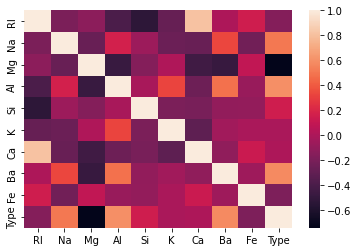

In [15]:
sns.heatmap(corr)

In [16]:
#We can notice that Ca and K values don't affect Type that much.

#Also Ca and RI are highly correlated, this means using only RI is enough.

#So we can go ahead and drop Ca, and also K.(performed later)

# Scatter plot of two features, and pairwise plot

<AxesSubplot:xlabel='RI', ylabel='Na'>

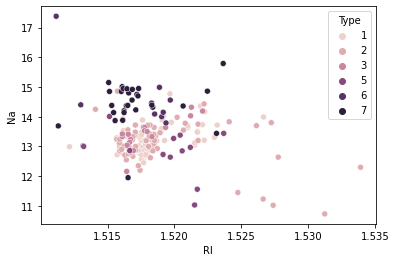

In [17]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

In [18]:
# Suppose we consider only RI, and Na values for classification for glass type.

#From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
#If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.
#But there are a lot more than two features based on which we can classify. So let us take a look at pairwise plot to captur

# Pair Plot

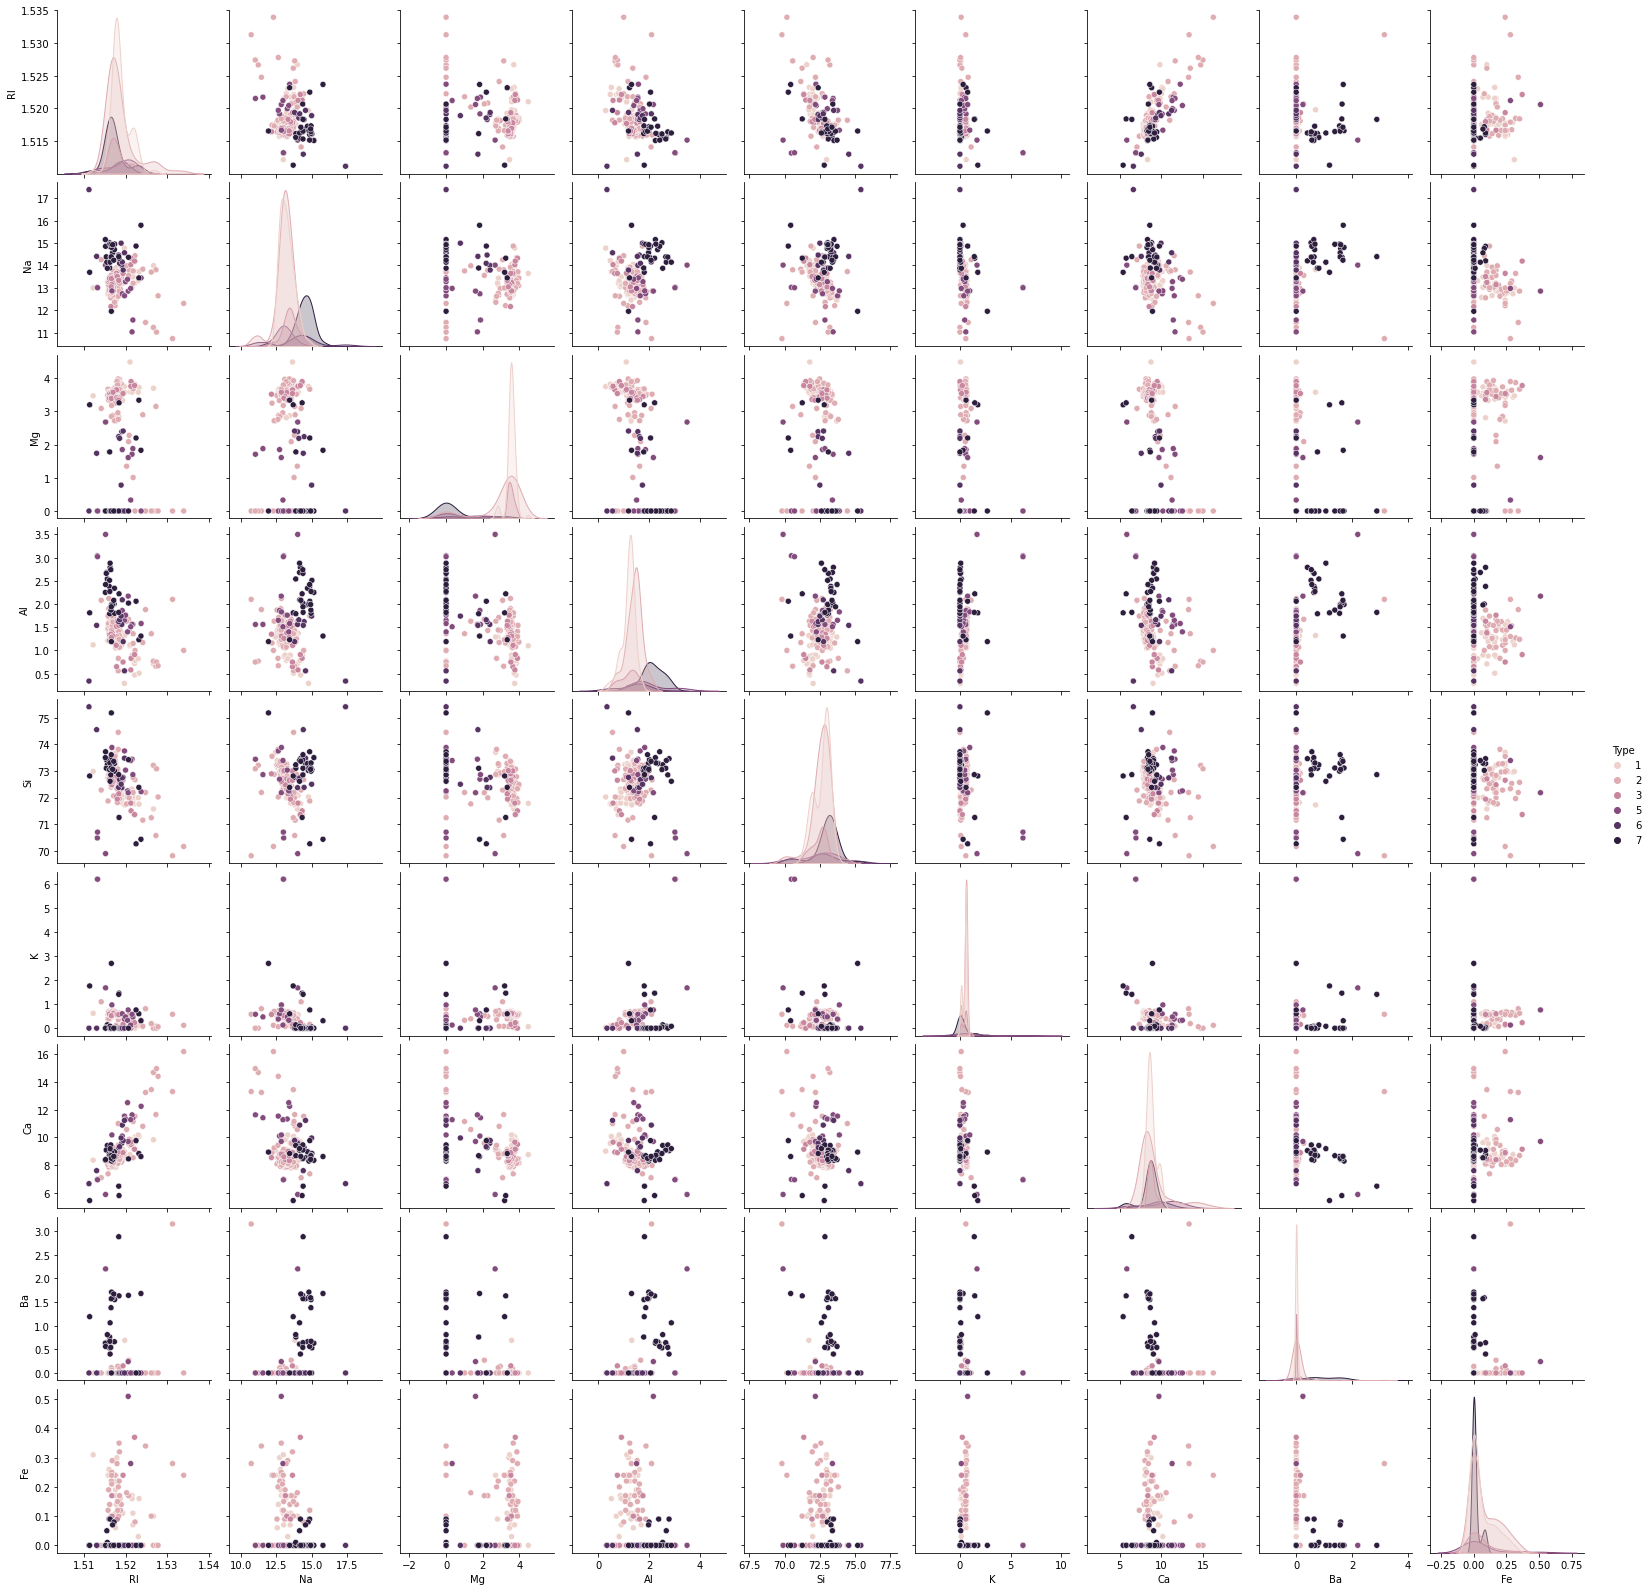

In [19]:
#pairwise plot of all the features
sns.pairplot(glass,hue='Type')
plt.show()

In [20]:
##The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

<AxesSubplot:xlabel='Type', ylabel='RI'>

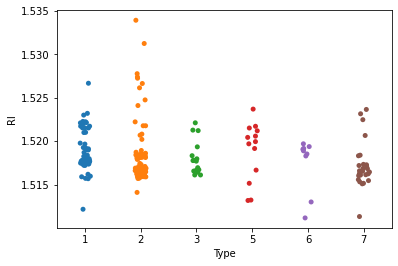

In [21]:
# Visualizing the content of different elements in the various types of glass

sns.stripplot(x='Type',y='RI',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Na'>

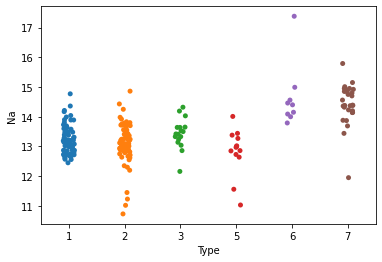

In [22]:
sns.stripplot(x='Type',y='Na',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Mg'>

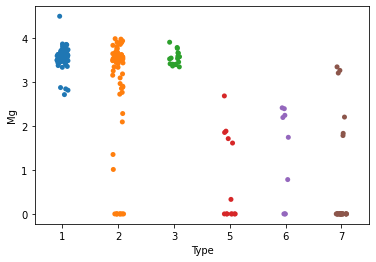

In [23]:
sns.stripplot(x='Type',y='Mg',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Al'>

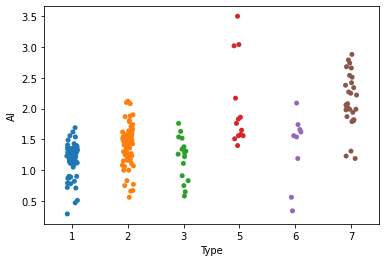

In [24]:
sns.stripplot(x='Type',y='Al',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Si'>

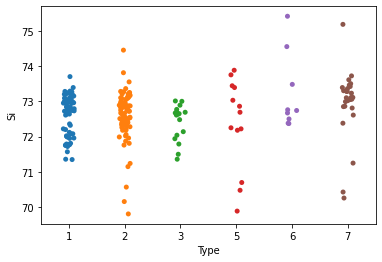

In [25]:
sns.stripplot(x='Type',y='Si',data=glass)

<AxesSubplot:xlabel='Type', ylabel='K'>

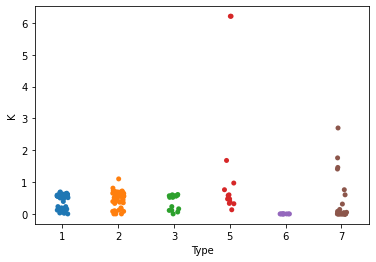

In [26]:
sns.stripplot(x='Type',y='K',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Ca'>

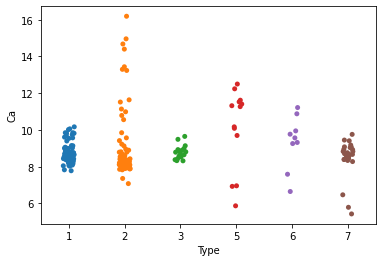

In [27]:
sns.stripplot(x='Type',y='Ca',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Ba'>

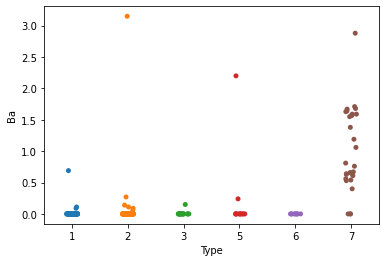

In [28]:
sns.stripplot(x='Type',y='Ba',data=glass)

<AxesSubplot:xlabel='Type', ylabel='Fe'>

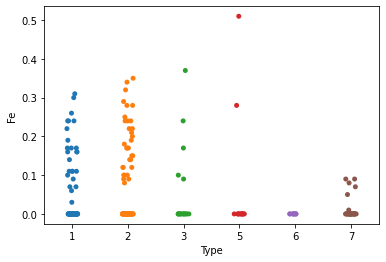

In [29]:
sns.stripplot(x='Type',y='Fe',data=glass)

# Outliers Detection

# Box plot

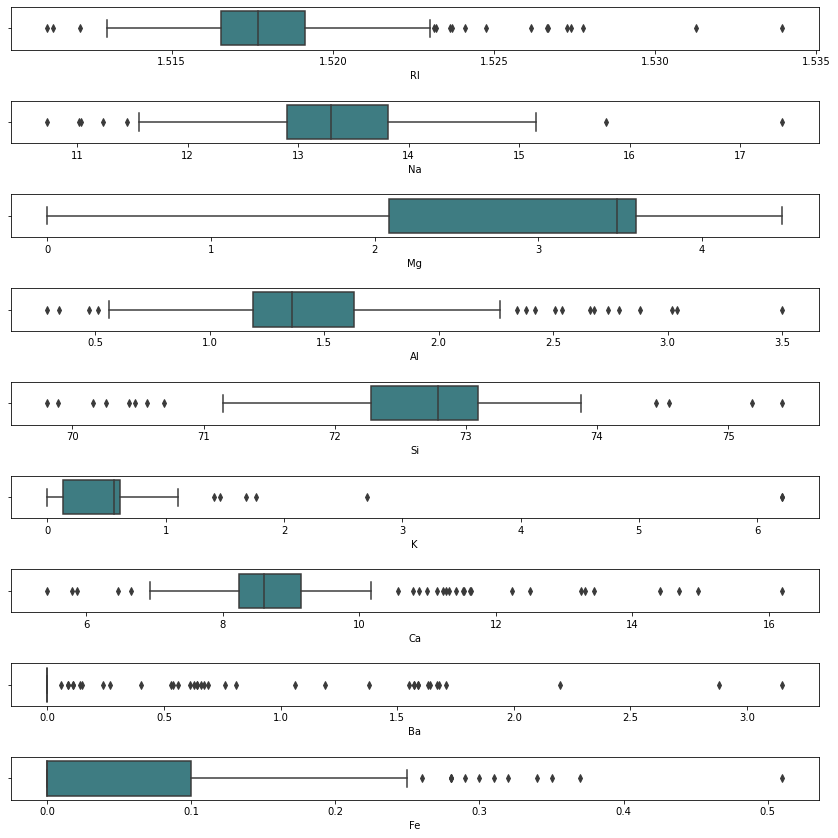

In [30]:
outlier = glass.copy() 
fig, axes=plt.subplots(9,1,figsize=(12,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=outlier,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

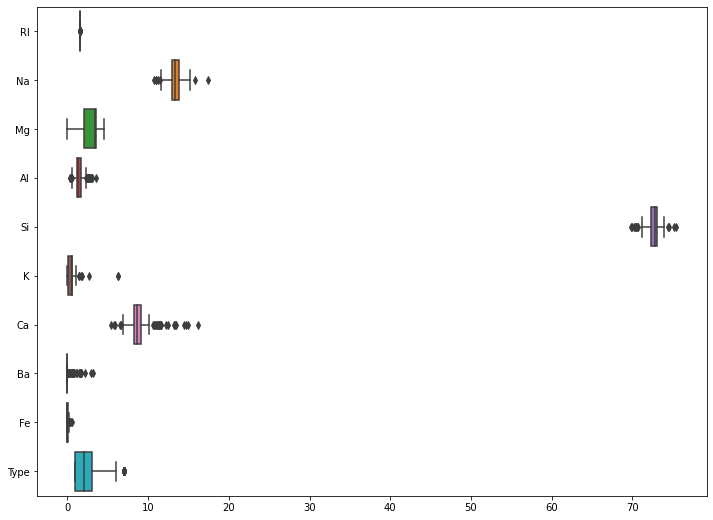

In [31]:
plt.figure(figsize=(12,9))
sns.boxplot(data=glass, orient="h");

# Silicon has a mean that is much superior to the other constituents. Well, that is normal since glass is mainly based on silica.

# Bar Plot

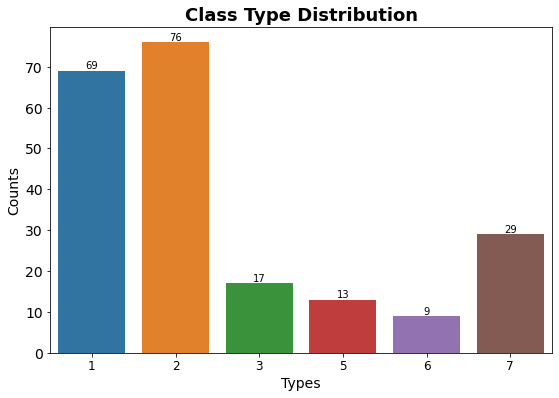

In [32]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = glass['Type'].value_counts().index.tolist(), y = glass['Type'].value_counts().tolist())
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
for i in ax.containers:
    ax.bar_label(i,)

# Pie Chart

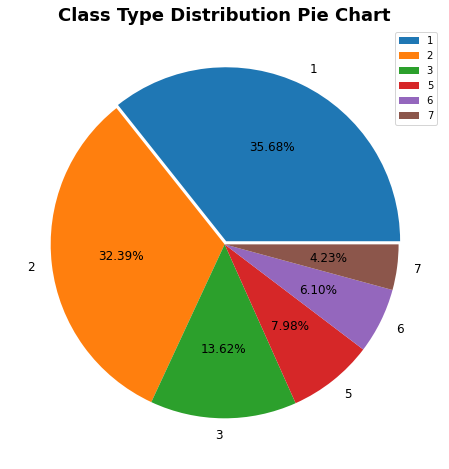

In [33]:
plt.figure(figsize = (8,8))
plt.pie(glass['Type'].value_counts(),
       labels=glass.Type.unique(), explode = [0.02,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size':'large'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Pre-Processing

# Hunting and removing multiple outliers

In [ ]:
#Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [81]:
# Detect observations with more than one outlier
features = glass.columns[:-1].tolist()
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col],75) # 3rd quartile (75%)
        IQR = Q3 - Q1 # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features])))) 

The dataset contains 14 observations with more than 2 outliers


In [82]:
outlier_indices = outlier_hunt(glass[features])
df = glass.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


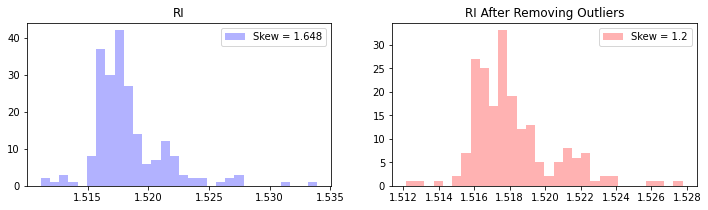

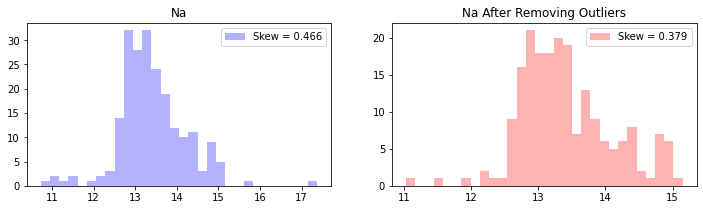

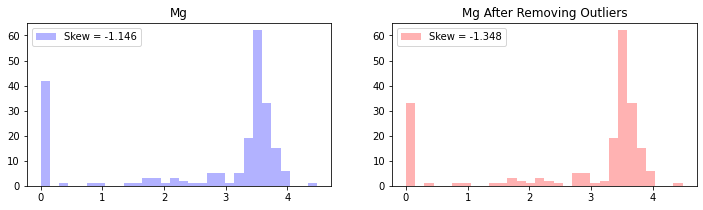

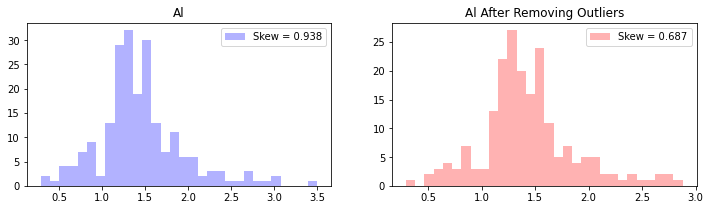

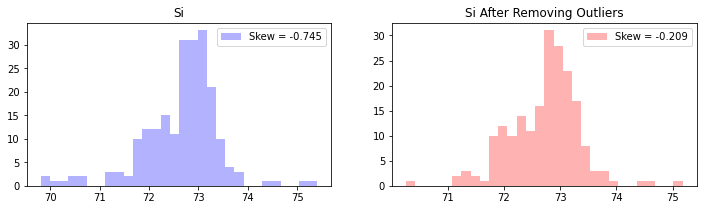

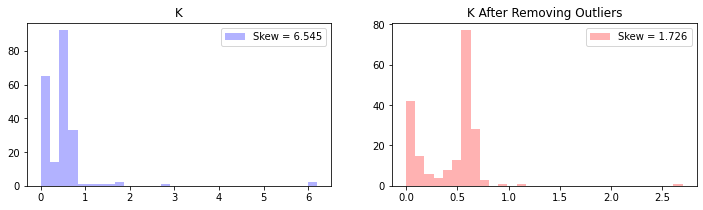

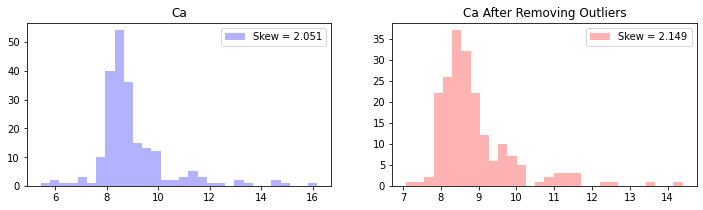

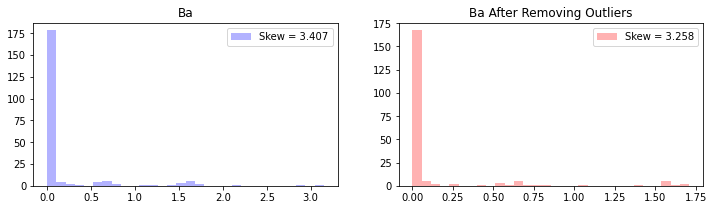

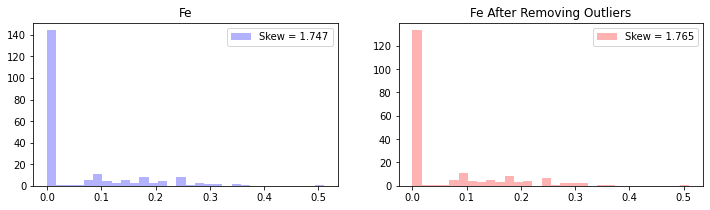

In [83]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(12,3))    
    ax[0].hist(glass[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass[feature].skew(),3))))
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    
    ax[1].hist(df[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))))
    ax[1].set_title(str(feature)+' After Removing Outliers')
    ax[1].legend(loc=0)
    plt.show()

# Feature Scaling

In [34]:
#Scaling the data (leaving out the target variable)
df1= df.iloc[:,0:9]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                     #Normalised dataset

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# Train Test Split

In [84]:
X = df.drop('Type',axis=1)
y = df[['Type']]

In [85]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
195,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
196,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
197,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [86]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
194,7
195,7
196,7
197,7


In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [88]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
153,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
66,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17
26,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.00
131,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00
146,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00
...,...,...,...,...,...,...,...,...,...
67,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
192,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
117,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00
47,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00


In [89]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
18,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00
169,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00
106,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14
92,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00
176,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00
183,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
139,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00
12,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
160,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00


In [90]:
y_train

,Type
153,3
66,1
26,1
131,2
146,3
...,...
67,1
192,7
117,2
47,1


In [91]:
y_test

,Type
18,1
169,6
106,2
92,2
176,7
183,7
5,1
139,3
12,1
160,5


In [92]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (159, 9)
Shape of X_test  :  (40, 9)
Shape of y_train :  (159, 1)
Shape of y_test  :  (40, 1)


# Choose the value for K

# Grid search for choosing the best Value of K

In [93]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [94]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [95]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [96]:
print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


# Visualizing the CV results

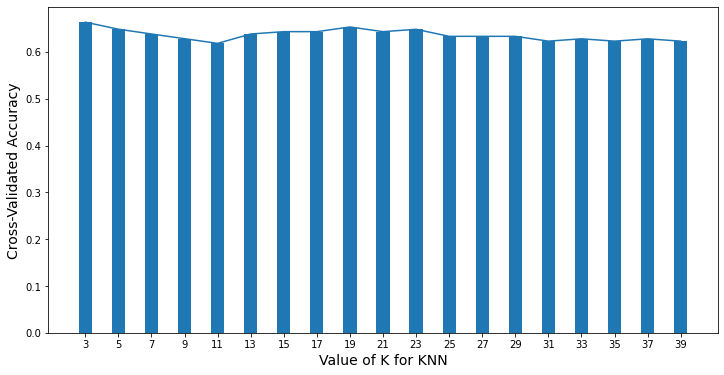

In [97]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,6))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 14)
plt.ylabel('Cross-Validated Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

In [98]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.663421
8,0.653158
1,0.648421
10,0.648158
6,0.643158
7,0.643158
9,0.643158
5,0.638158
2,0.638158
11,0.633158


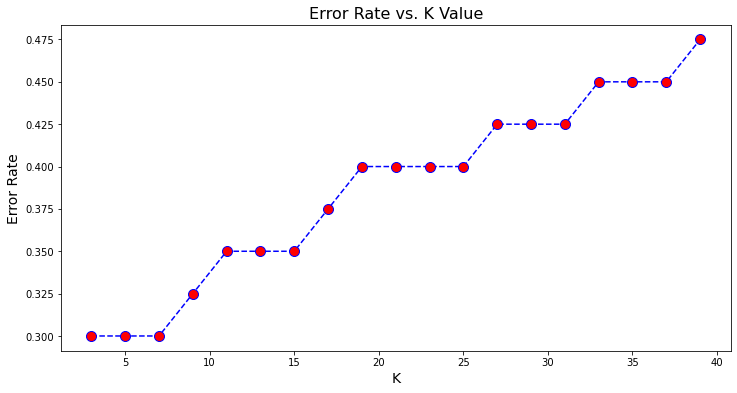

In [99]:
error_rate = []
k_range = [i for i in range(3,40, 2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,40,2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

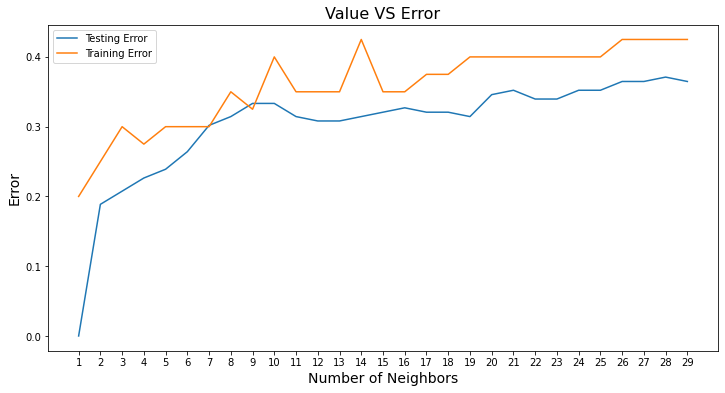

In [101]:
error1= []
error2= []
k_range = [i for i in range(1,30)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(159,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(40,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()

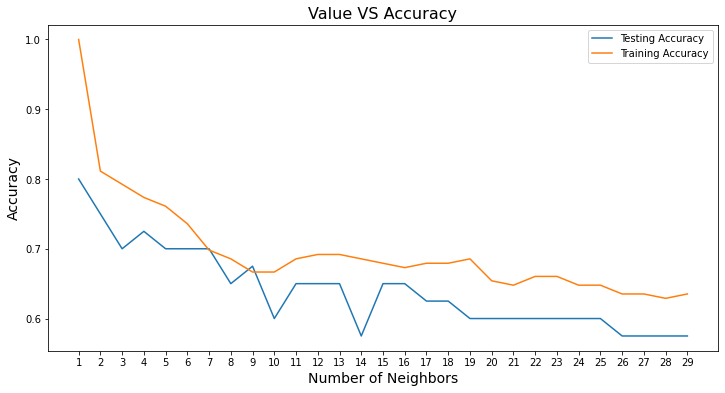

In [103]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

# Applying KNN

# K = 3

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[11  2  1  0  0  0]
 [ 3  8  0  1  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  5]]


              precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.73      0.67      0.70        12
           3       0.00      0.00      0.00         3
           5       0.75      0.75      0.75         4
           6       0.50      1.00      0.67         1
           7       1.00      0.83      0.91         6

    accuracy                           0.70        40
   macro avg       0.60      0.67      0.62        40
weighted avg       0.68      0.70      0.69        40



# K = 5

In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[10  3  1  0  0  0]
 [ 3  9  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  5]]


              precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         1
           7       1.00      0.83      0.91         6

    accuracy                           0.70        40
   macro avg       0.64      0.67      0.64        40
weighted avg       0.69      0.70      0.69        40



In [106]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6291666666666667


In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         1
           7       1.00      0.83      0.91         6

    accuracy                           0.70        40
   macro avg       0.64      0.67      0.64        40
weighted avg       0.69      0.70      0.69        40



In [108]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[10  3  1  0  0  0]
 [ 3  9  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  5]]


# K-Nearest Neighbors (K-NN)

In [114]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [115]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [116]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 1.0
Testing Accuracy  : 0.675


# Conclusion:

# The duplicated values and the outliers were removed from the dataset, Standard Scaler was used to scaled on the train and test data Grid Serach was used to find the optimal k value for the KNN algorithm The accuracy of KNN models was greater then every value where K = 3